# 2 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Listing Price](#2.4.1_Listing_Price)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats
from datetime import date

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [2]:
SingleFamilyHome = pd.read_csv('../data/processed/SingleFamily.csv')

In [3]:
SingleFamilyHome.head()

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
0,['https://photos.harstatic.com/189100987/hr/im...,408000,2614 Capitol Street,Houston,77003,Harris County,LT 7 BLK 1 CAPITOL OAKS SEC 1 2ND AMEND,3,3.0,"Contemporary/Modern,Traditional",...,2012,1563,443500.0,200.05,8899.0,2.5466,522.0,3,1,2250.0
1,['https://photos.harstatic.com/189116198/hr/im...,402115,2708 EaDo Grove Lane,Houston,77003,Harris County,LT 19 BLK 1 EaDo Grove,3,3.0,Contemporary/Modern,...,2018,1485,217000.0,192.51,2169.0,2.6554,474.0,3,1,1195.0
2,['https://photos.harstatic.com/188179029/hr/im...,419000,619 Live Oak Street,Houston,77003,Harris County,LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Traditional,...,2012,1563,443500.0,200.05,8899.0,2.5466,320.0,3,1,2244.0
3,['https://photos.harstatic.com/190180506/hr/im...,320000,1725 Aden Drive,Houston,77003,Harris County,LT 66 BLK 1 MIDTOWN VILLAGE,2,2.0,Split Level,...,2005,1904,259000.0,181.62,7078.0,2.5466,302.0,2,1,1400.0
4,['https://photos.harstatic.com/189461143/hr/im...,305000,1716 Aden Mist Drive,Houston,77003,Harris County,LT 117 BLK 1 MIDTOWN VILLAGE,2,2.0,Traditional,...,2005,1904,259000.0,181.62,7155.0,2.5466,340.0,2,0,1400.0


In [4]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6306 non-null   object 
 1   ListingPrice         6306 non-null   int64  
 2   Address              6306 non-null   object 
 3   City                 6306 non-null   object 
 4   ZipCode              6306 non-null   int64  
 5   County               6306 non-null   object 
 6   Legal                6306 non-null   object 
 7   NoBed                6306 non-null   int64  
 8   Stories              6306 non-null   float64
 9   Style                6306 non-null   object 
 10  YearBuilt            6306 non-null   int64  
 11  BuildSqft            6306 non-null   int64  
 12  LotSize              6306 non-null   float64
 13  Fireplace            6306 non-null   int64  
 14  Heating              6306 non-null   object 
 15  Cooling              6306 non-null   o

In [5]:
SingleFamilyHome.shape

(6306, 57)

There are some features with Yes and No category lets transfer them to 1 and 0 which 1 is Yes and 0 for No.

In [6]:
SingleFamilyHome = SingleFamilyHome.replace(to_replace = ['Yes','No'],value = [1,0])

In [7]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6306 non-null   object 
 1   ListingPrice         6306 non-null   int64  
 2   Address              6306 non-null   object 
 3   City                 6306 non-null   object 
 4   ZipCode              6306 non-null   int64  
 5   County               6306 non-null   object 
 6   Legal                6306 non-null   object 
 7   NoBed                6306 non-null   int64  
 8   Stories              6306 non-null   float64
 9   Style                6306 non-null   object 
 10  YearBuilt            6306 non-null   int64  
 11  BuildSqft            6306 non-null   int64  
 12  LotSize              6306 non-null   float64
 13  Fireplace            6306 non-null   int64  
 14  Heating              6306 non-null   object 
 15  Cooling              6306 non-null   o

Zip code should be categorical not int64

In [8]:
SingleFamilyHome.ZipCode = SingleFamilyHome.ZipCode.astype('object',copy=False)

In [9]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6306 non-null   object 
 1   ListingPrice         6306 non-null   int64  
 2   Address              6306 non-null   object 
 3   City                 6306 non-null   object 
 4   ZipCode              6306 non-null   object 
 5   County               6306 non-null   object 
 6   Legal                6306 non-null   object 
 7   NoBed                6306 non-null   int64  
 8   Stories              6306 non-null   float64
 9   Style                6306 non-null   object 
 10  YearBuilt            6306 non-null   int64  
 11  BuildSqft            6306 non-null   int64  
 12  LotSize              6306 non-null   float64
 13  Fireplace            6306 non-null   int64  
 14  Heating              6306 non-null   object 
 15  Cooling              6306 non-null   o

In [10]:
categorical=[]
numerical=[]
for i in range(SingleFamilyHome.columns.size):
    if SingleFamilyHome.iloc[:,i].dtype=="object":
        categorical.append(SingleFamilyHome.columns[i])
    else:
        numerical.append(SingleFamilyHome.columns[i])

## 2.5 Numerical Variables<a id='2.5_Numerical_Variables'></a>

First lets look at numerical variables to see what are their statistics summary, correlation and their distribution

### 2.5.1 Listing Price<a id='2.4.1_Listing_Price'></a>

In [11]:
SingleFamilyHome.ListingPrice.describe()

count    6.306000e+03
mean     5.096541e+05
std      5.980943e+05
min      2.390000e+04
25%      2.379250e+05
50%      3.390000e+05
75%      5.450000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

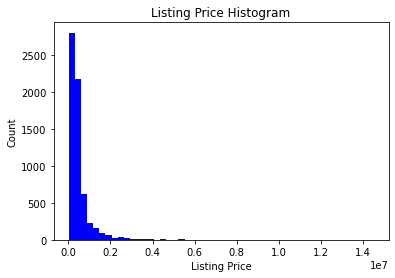

In [12]:
plt.hist(SingleFamilyHome.ListingPrice,bins=50, color='blue')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.title('Listing Price Histogram')

plt.show()

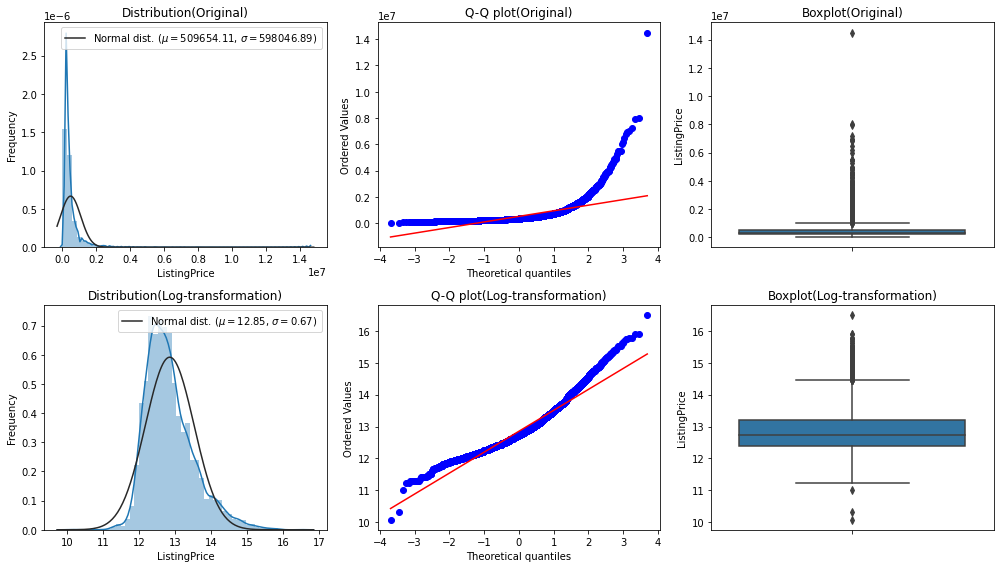

In [13]:
fig, ax = plt.subplots(2,3, figsize=(14,8))
##### Original
# histgram
sns.distplot(SingleFamilyHome['ListingPrice'] , fit=norm, ax=ax[0,0])
mu, sigma = norm.fit(SingleFamilyHome['ListingPrice'])
ax[0,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Distribution(Original)')
# Q-Q plot
_ = stats.probplot(SingleFamilyHome['ListingPrice'], plot=ax[0,1])
ax[0,1].set_title('Q-Q plot(Original)')
# plot boxplot
sns.boxplot(SingleFamilyHome['ListingPrice'] , orient='v', ax=ax[0,2])
ax[0,2].set_title('Boxplot(Original)')

##### Log-transformation
logged = np.log1p(SingleFamilyHome['ListingPrice'])
# histgram
sns.distplot(logged , fit=norm, ax=ax[1,0])
mu, sigma = norm.fit(logged)
ax[1,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Distribution(Log-transformation)')
# Q-Q plot
_ = stats.probplot(logged, plot=ax[1,1])
ax[1,1].set_title('Q-Q plot(Log-transformation)')
# plot boxplot
sns.boxplot(logged , orient='v', ax=ax[1,2])
ax[1,2].set_title('Boxplot(Log-transformation)')

fig.tight_layout()

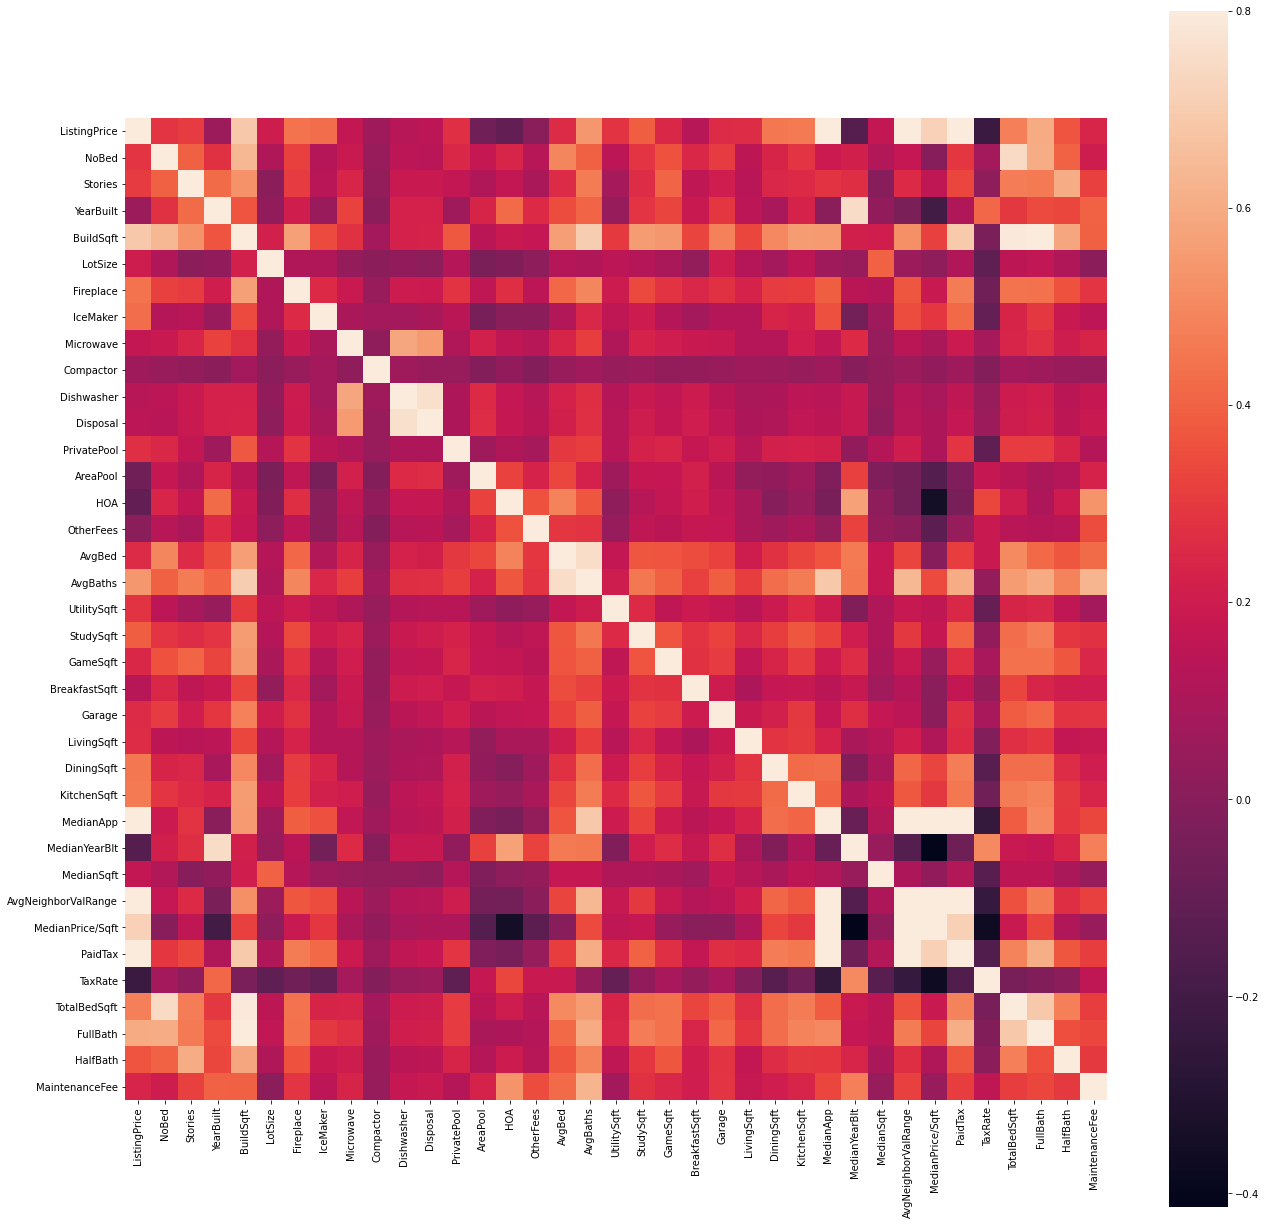

In [14]:
corr = SingleFamilyHome.select_dtypes(include=['float64', 'int64']).iloc[:,0:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [15]:
# Correlation between attributes with SalePrice
corr_list = corr['ListingPrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

PaidTax                0.915134
MedianApp              0.827783
AvgNeighborValRange    0.804089
MedianPrice/Sqft       0.715361
BuildSqft              0.690425
FullBath               0.599141
AvgBaths               0.540162
TotalBedSqft           0.474224
KitchenSqft            0.461159
DiningSqft             0.455268
Fireplace              0.442930
IceMaker               0.429723
StudySqft              0.392130
HalfBath               0.364306
Stories                0.303974
NoBed                  0.284573
UtilitySqft            0.282491
PrivatePool            0.272394
LivingSqft             0.261984
AvgBed                 0.259559
Garage                 0.257277
GameSqft               0.247606
MaintenanceFee         0.238273
LotSize                0.200151
MedianSqft             0.169249
Microwave              0.168376
Disposal               0.147158
Dishwasher             0.133527
BreakfastSqft          0.132399
Compactor              0.069433
YearBuilt              0.058675
OtherFee

Listing price is highly correlated to Median appraisal followed by neighborhood max and min range. 

In [16]:
high_correlated_features = ['MedianApp','AvgNeighborValRange','MedianPrice/Sqft','PaidTax',
                            'FullBath','BuildSqft','AvgBaths']

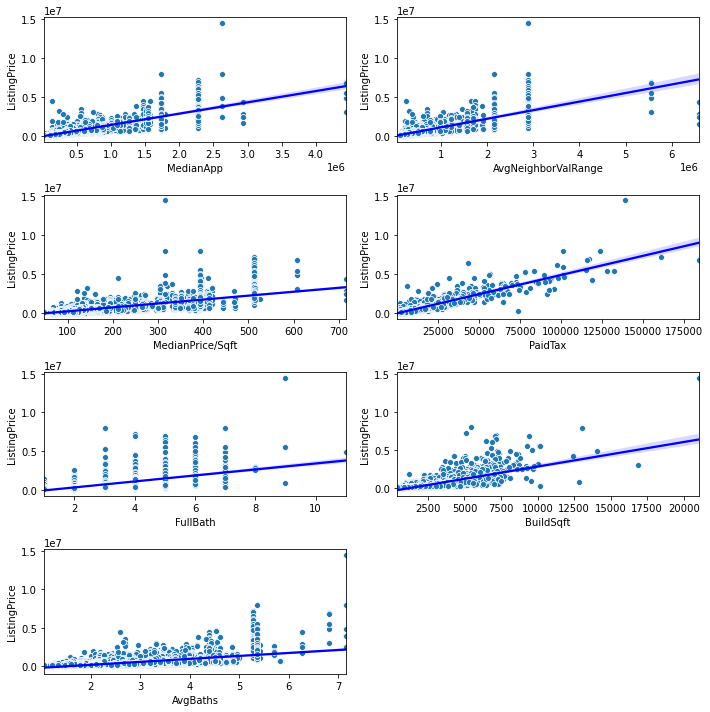

In [17]:
'''Plot appropriate graphs to comprehend the relationship'''
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=4)
for i , var in enumerate(high_correlated_features):
    ax_i = fig.add_subplot(spec[i])
    sns.scatterplot(x=var, y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
    sns.regplot(x=var, y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')
    ax_i=plt.gca()
plt.tight_layout()
plt.show()


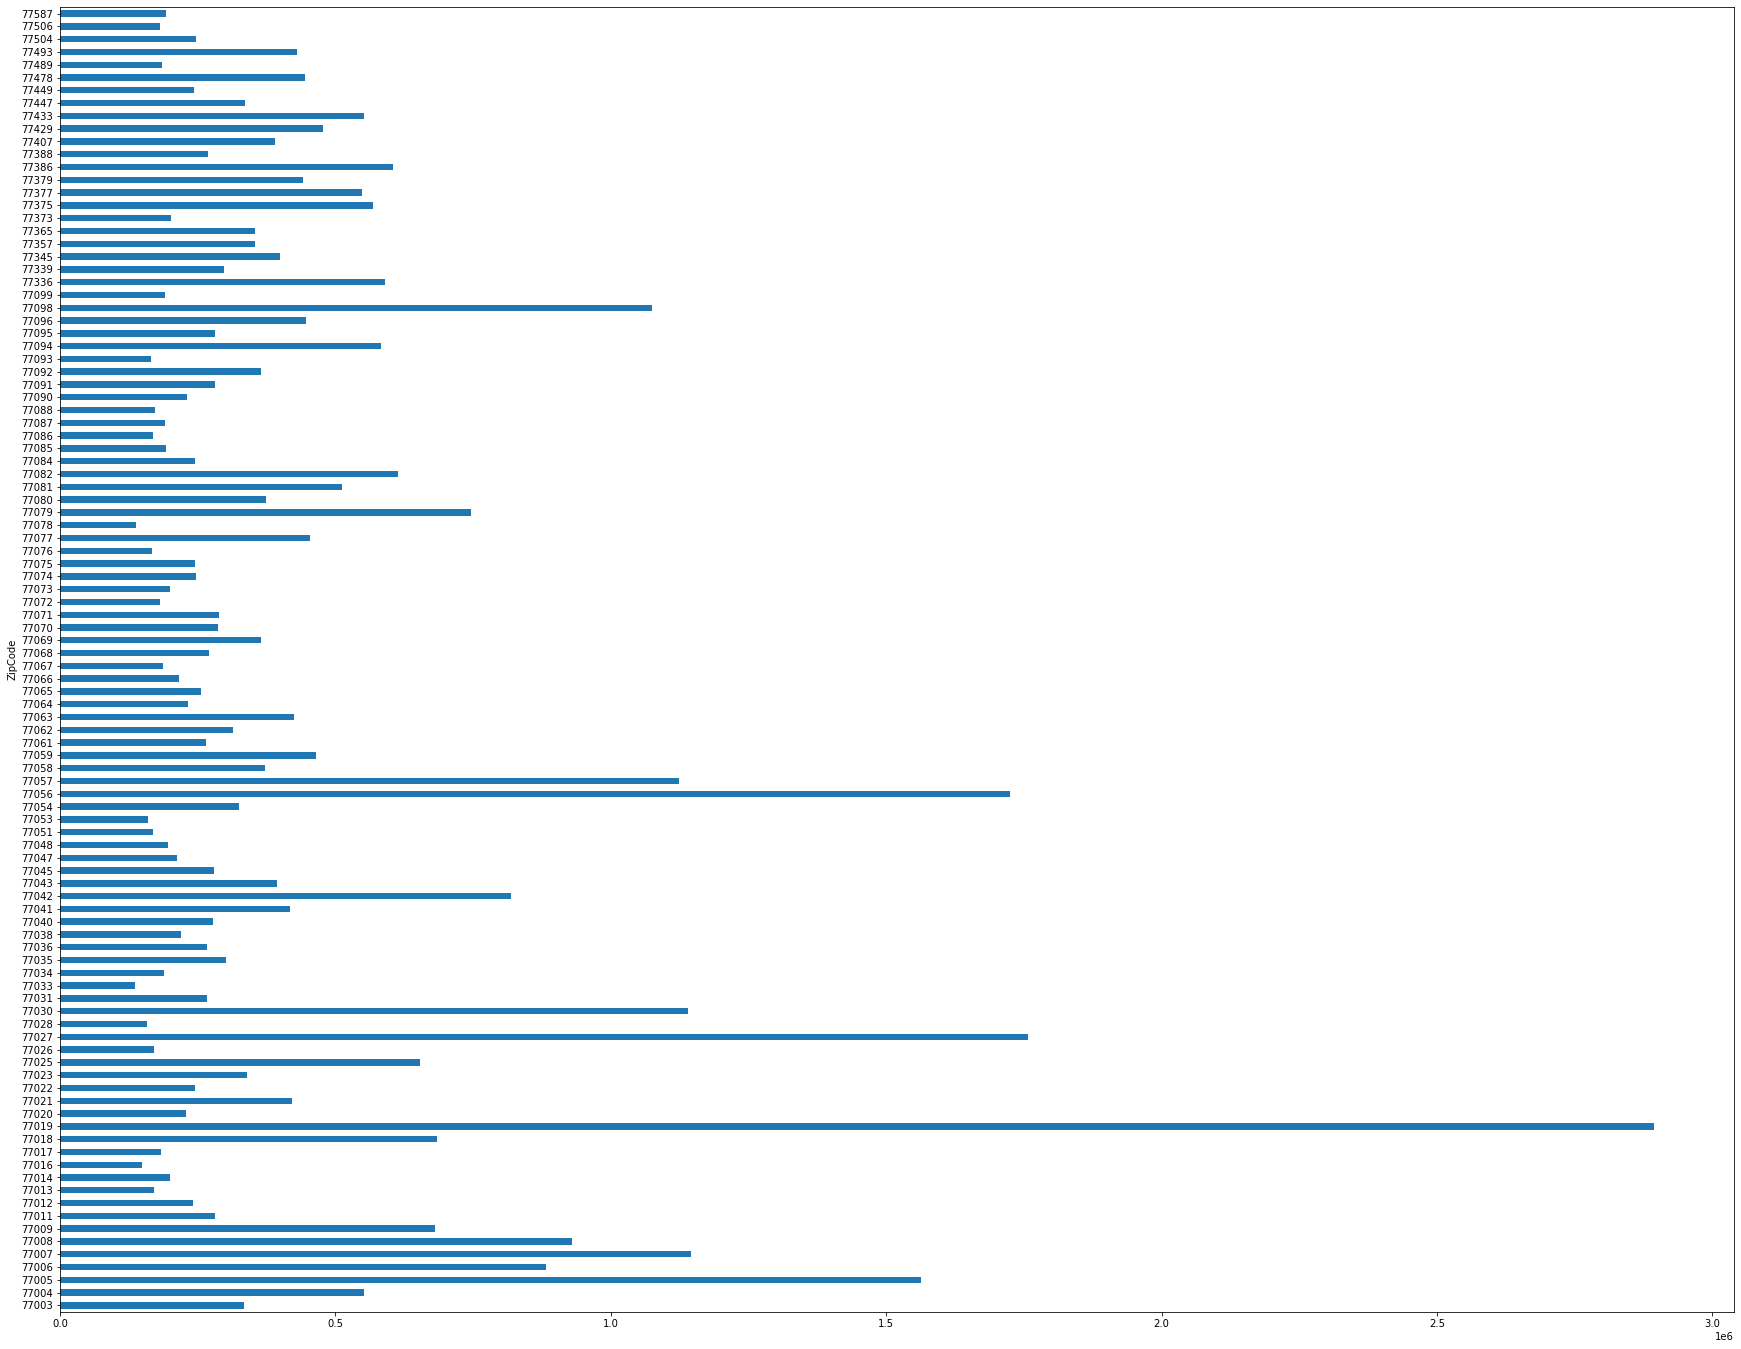

In [18]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].mean().plot(kind='barh')

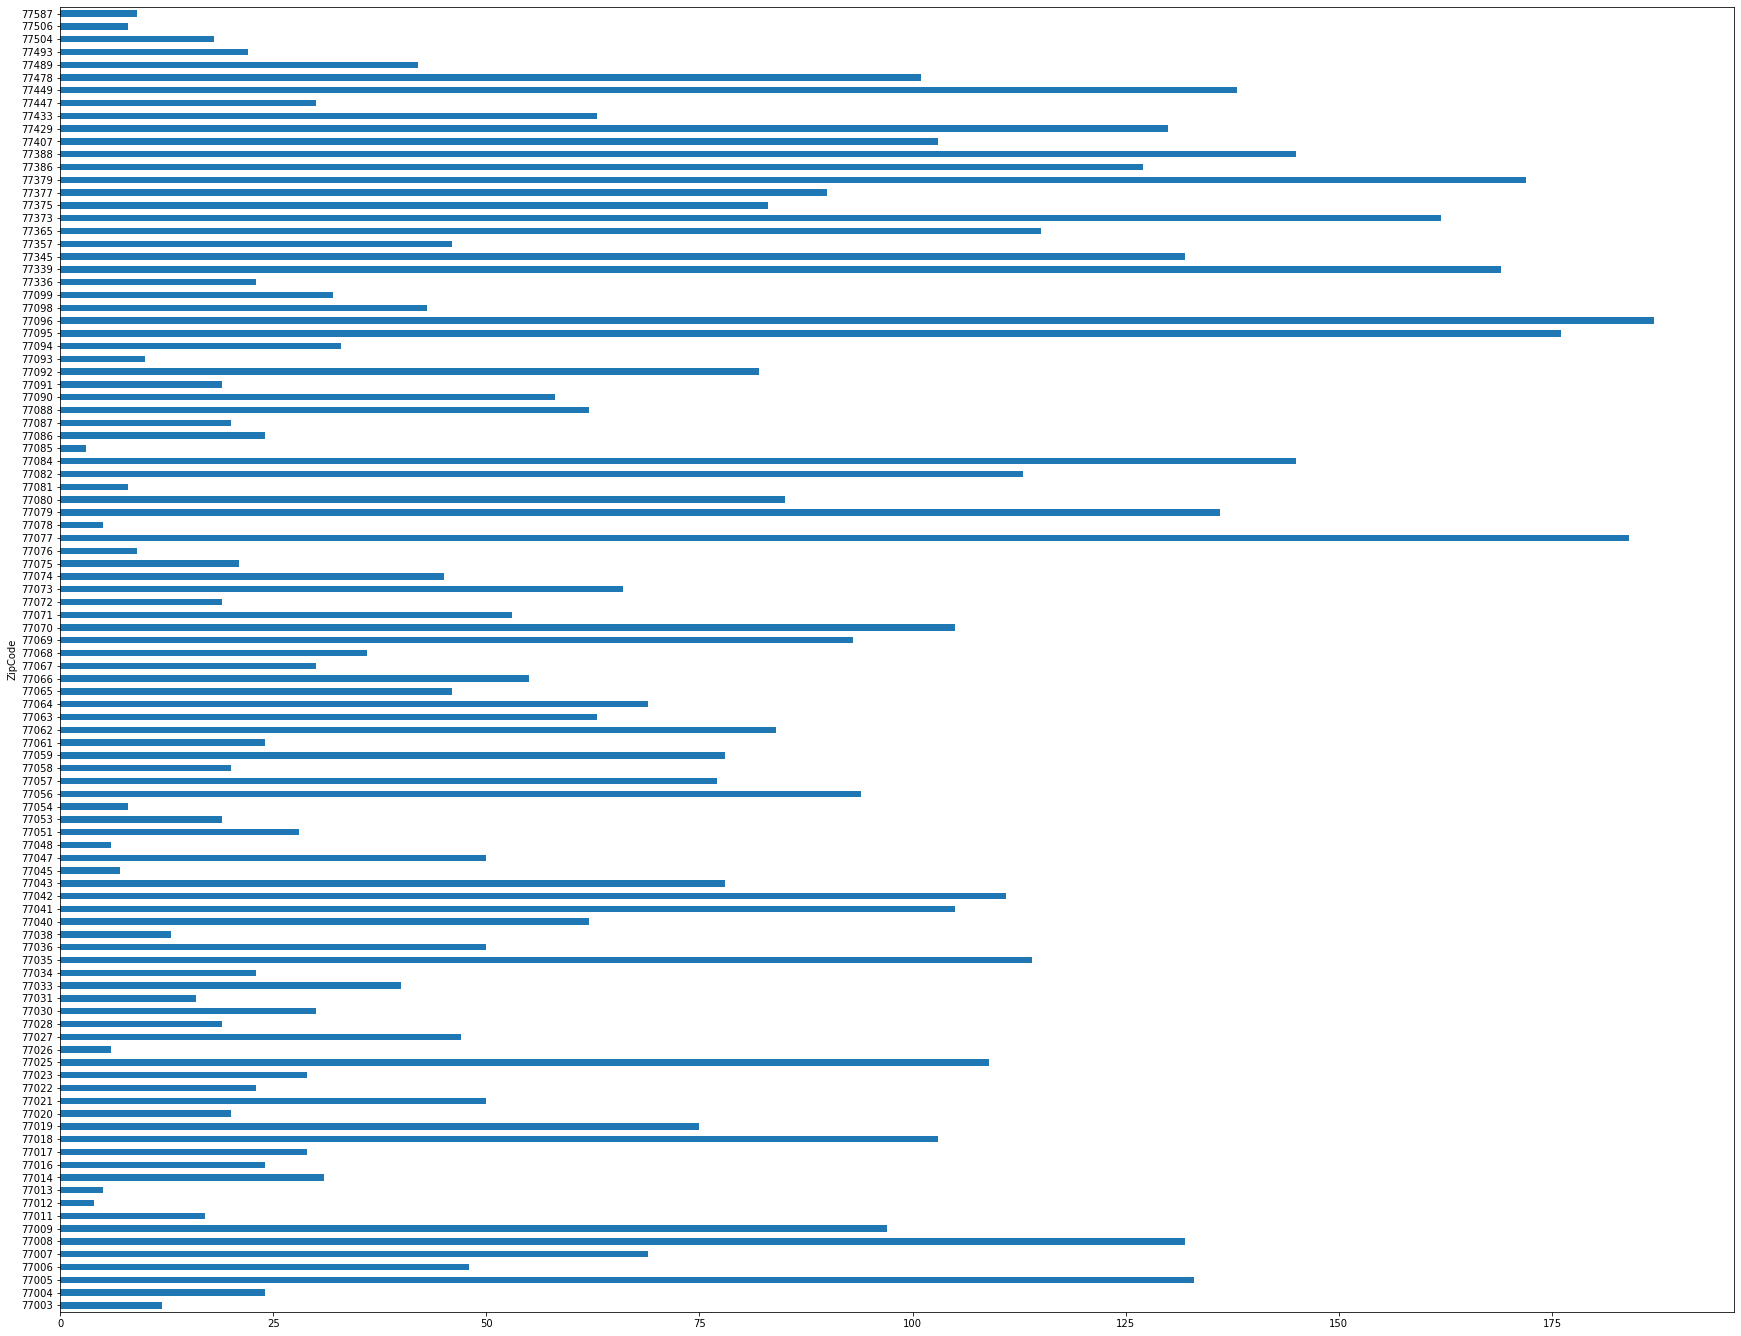

In [45]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].count().plot(kind='barh')

Zip code 77019 has highest average price which includes one of the most expensive are in TX called `River Oak`.

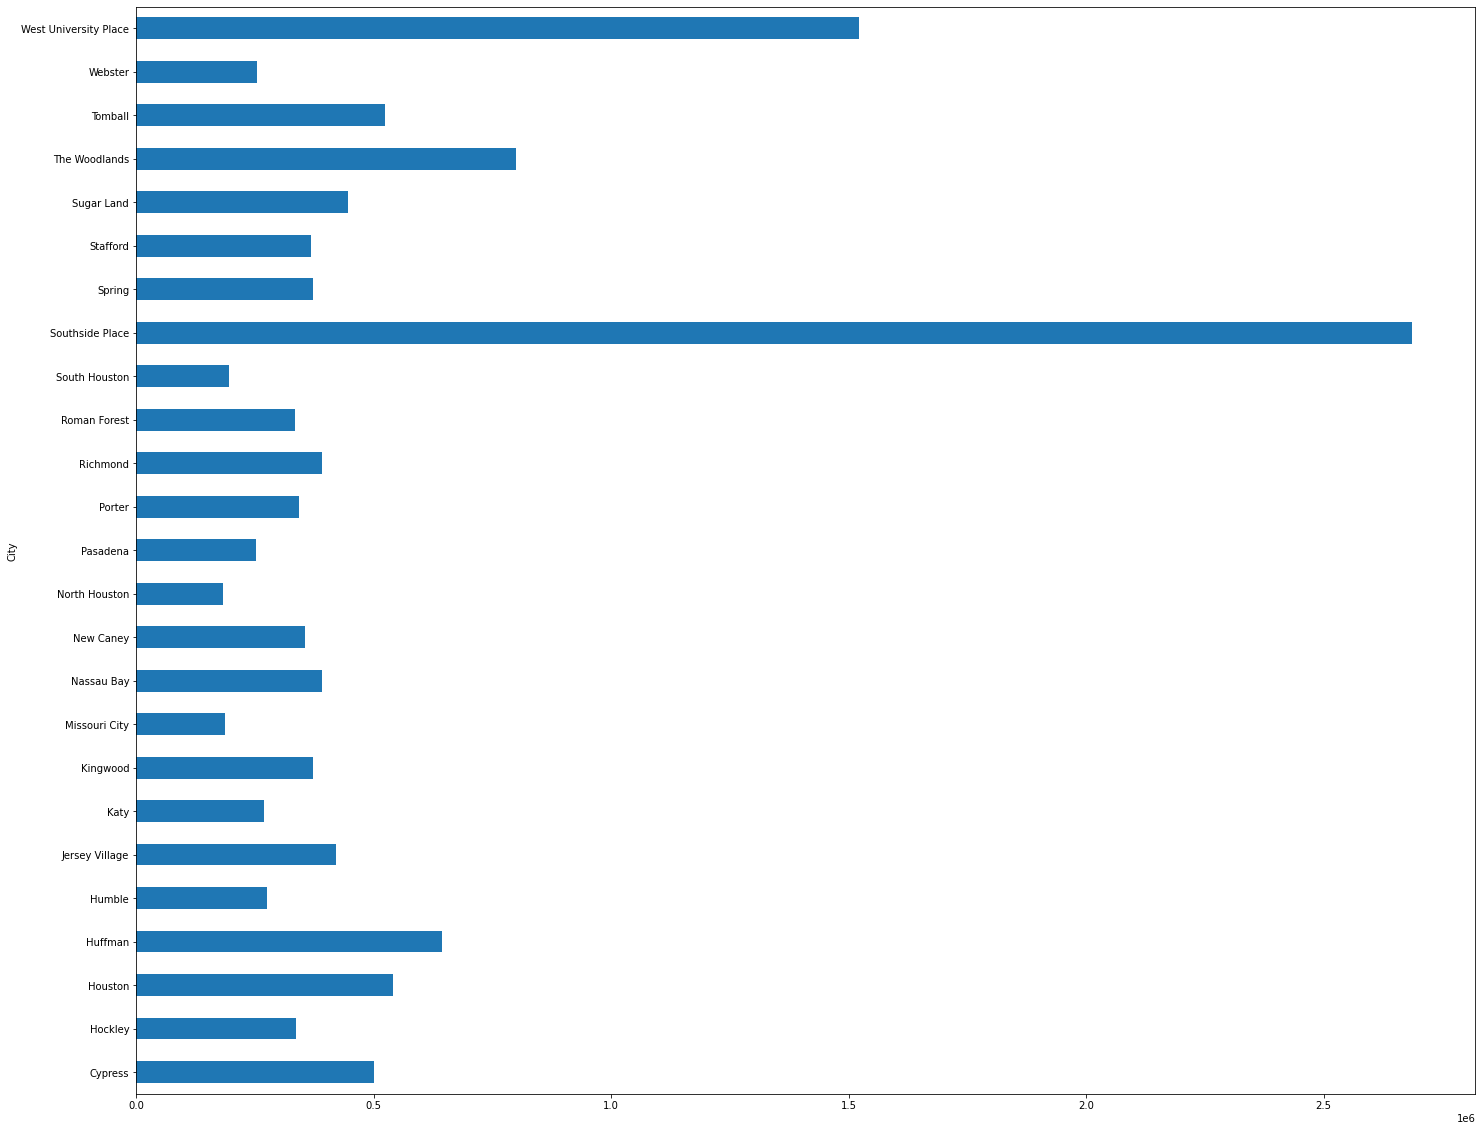

In [19]:
plt.figure(figsize=(24,20))
SingleFamilyHome.groupby('City')['ListingPrice'].mean().plot(kind='barh')

Surprisingly price average for houses in southside place is higher than other cities. lets take a look at these area:

In [20]:
SingleFamilyHome[SingleFamilyHome.City == 'Southside Place']

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
49,['https://photos.harstatic.com/189052667/hr/im...,1895000,3775 Elmora Street,Southside Place,77005,Harris County,LT 40 BLK 5 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992,7750,1642500.0,410.13,35411.000000,2.172400,784.0,4,1,0.0
77,['https://photos.harstatic.com/190418429/hr/im...,1799000,6357 Edloe Street,Southside Place,77005,Harris County,LT 40 & TR 41A BLK 1 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992,7750,1642500.0,410.13,33164.000000,2.172400,826.0,3,1,0.0
104,['https://photos.harstatic.com/188714913/hr/im...,2499000,3759 Ingold Street,Southside Place,77005,Harris County,LT 36 BLK 11 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992,7750,1642500.0,410.13,43861.000000,2.172400,812.0,4,2,0.0
125,['https://photos.harstatic.com/189115448/hr/im...,4549000,3745 Farber Street,Southside Place,77005,Harris County,LT 22 BLK 6 SOUTHSIDE PLACE,5,2.0,Traditional,...,1992,7750,1642500.0,410.13,31593.444444,2.182233,1031.0,6,3,0.0


There are 4 houses with the price more than \\$1.5 million. 

In [47]:
SingleFamilyHome.groupby('City')['ListingPrice'].count()

City
Cypress                   194
Hockley                    29
Houston                  4448
Huffman                    19
Humble                      5
Jersey Village             17
Katy                      160
Kingwood                  158
Missouri City              27
Nassau Bay                  9
New Caney                  43
North Houston               1
Pasadena                   32
Porter                    106
Richmond                  103
Roman Forest                3
South Houston               9
Southside Place             4
Spring                    607
Stafford                    1
Sugar Land                100
The Woodlands              18
Tomball                   153
Webster                     1
West University Place      59
Name: ListingPrice, dtype: int64

In [58]:
SingleFamilyHome.groupby('SubName')['ListingPrice'].count().sort_values()

SubName
ASHFORD MANOR               1
Ponderosa Trails            1
Pinemont Square             1
Pinemont Plaza              1
Pine Oak Forest             1
                           ..
Oak Forest ( East )        53
Meyerland                  59
Royal Oaks Country Club    59
Westbury                   80
Houston Heights            88
Name: ListingPrice, Length: 1021, dtype: int64

In [64]:
np.sum(SingleFamilyHome.groupby('SubName')['ListingPrice'].count() ==1)

148

In [21]:
SingleFamilyHome.describe()

,ListingPrice,NoBed,Stories,YearBuilt,BuildSqft,LotSize,Fireplace,IceMaker,Microwave,Compactor,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
count,6.306000e+03,6306.000000,6306.000000,6306.000000,6306.000000,6.306000e+03,6306.000000,6306.000000,6306.000000,6306.000000,...,6306.000000,6306.000000,6.306000e+03,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000
mean,5.096541e+05,3.725817,1.596337,1985.441643,2814.049794,1.112721e+04,0.839359,0.053124,0.709166,0.023945,...,1981.754678,9539.961941,4.010467e+05,150.395163,10480.975334,2.634078,656.702030,2.547732,0.636378,572.690771
std,5.980943e+05,0.807080,0.568569,24.007853,1281.071176,2.802390e+04,0.644660,0.224299,0.454183,0.152891,...,23.280565,15022.793093,4.386906e+05,85.202495,11107.513413,0.302255,237.193142,0.925293,0.589522,638.395977
min,2.390000e+04,1.000000,1.000000,1875.000000,400.000000,1.104000e+03,0.000000,0.000000,0.000000,0.000000,...,1902.000000,1375.000000,4.700000e+04,48.120000,282.000000,0.245000,3.000000,1.000000,0.000000,0.000000
25%,2.379250e+05,3.000000,1.000000,1968.000000,1964.000000,6.550000e+03,0.000000,0.000000,0.000000,0.000000,...,1963.250000,6600.000000,1.885000e+05,97.390000,5055.000000,2.421600,491.000000,2.000000,0.000000,0.000000
50%,3.390000e+05,4.000000,2.000000,1987.000000,2565.000000,8.165500e+03,1.000000,0.000000,1.000000,0.000000,...,1982.000000,7975.000000,2.780000e+05,116.160000,7518.000000,2.536600,627.000000,2.000000,1.000000,450.000000
75%,5.450000e+05,4.000000,2.000000,2006.000000,3372.750000,9.974500e+03,1.000000,0.000000,1.000000,0.000000,...,2003.000000,9375.000000,4.540000e+05,164.530000,11621.750000,2.763200,774.750000,3.000000,1.000000,760.000000
max,1.450000e+07,10.000000,3.000000,2019.000000,21032.000000,1.306800e+06,5.000000,1.000000,1.000000,1.000000,...,2019.000000,903156.000000,6.587000e+06,715.670000,183920.000000,3.902600,2725.000000,11.000000,5.000000,4320.000000


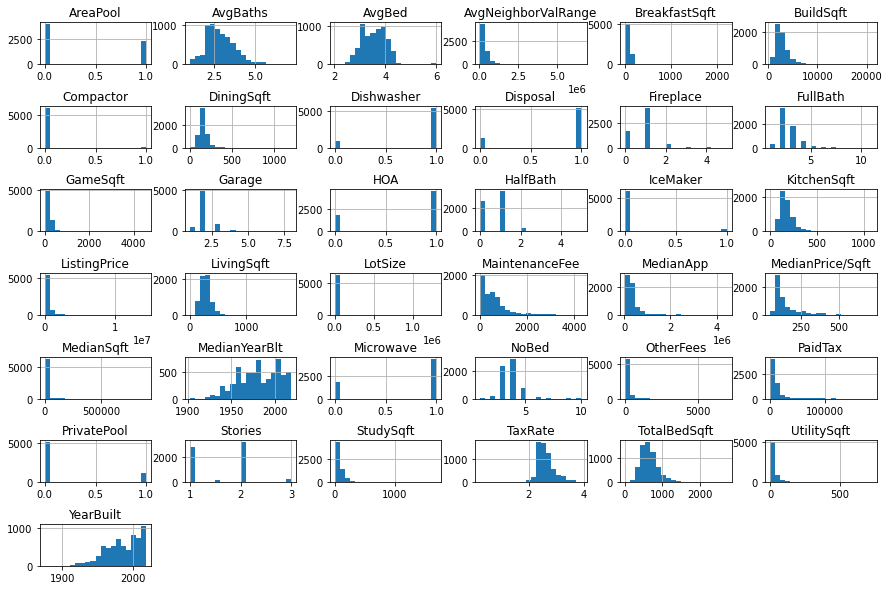

In [22]:
SingleFamilyHome.hist(figsize=(15,10),bins=20)
plt.subplots_adjust(hspace=1)

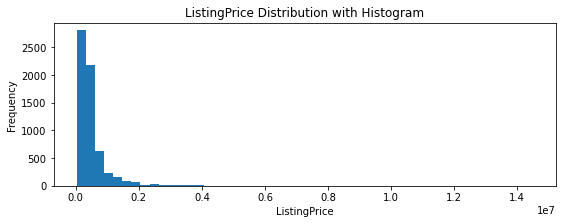

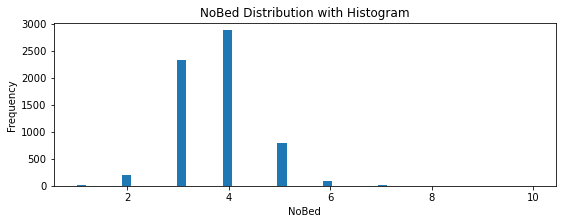

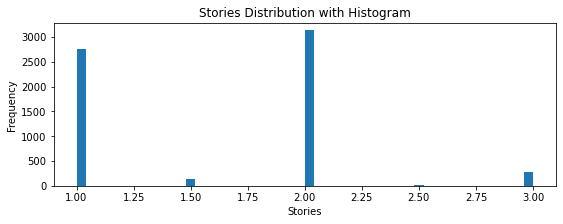

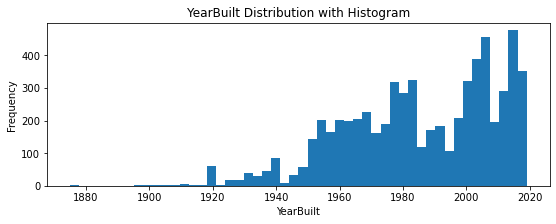

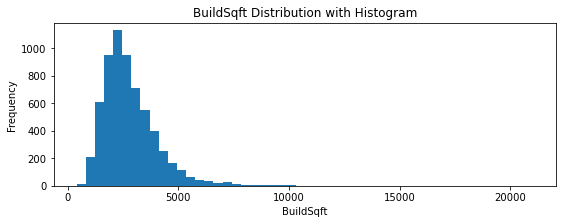

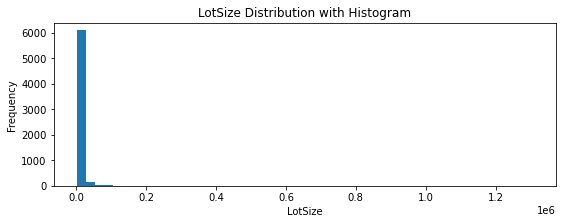

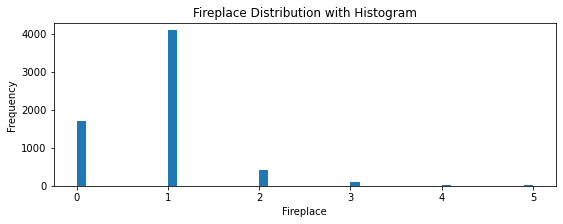

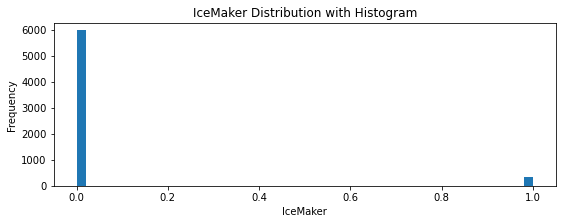

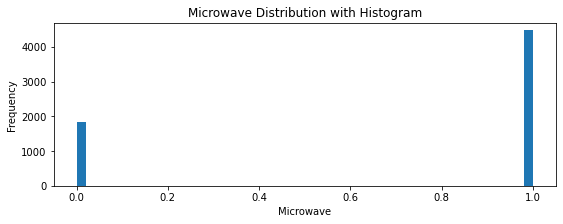

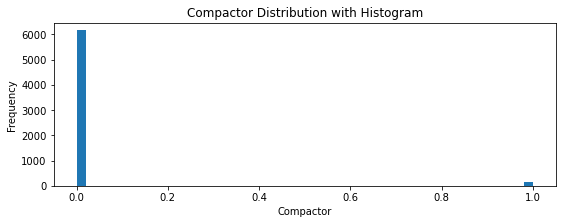

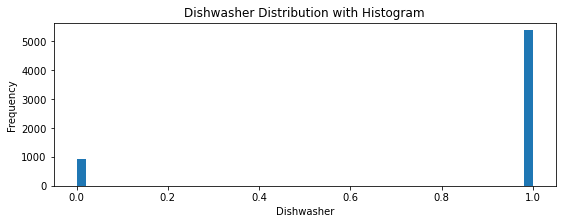

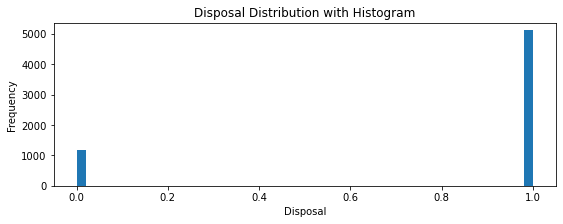

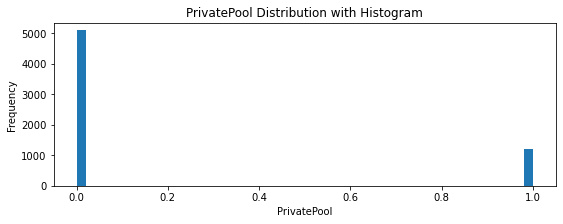

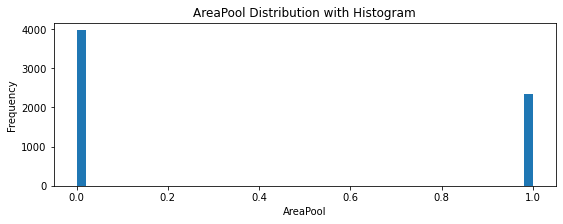

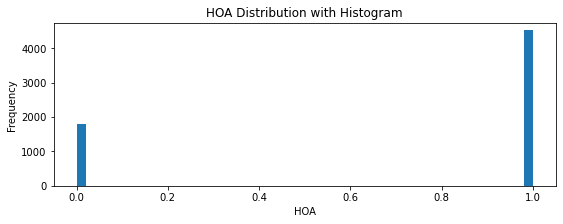

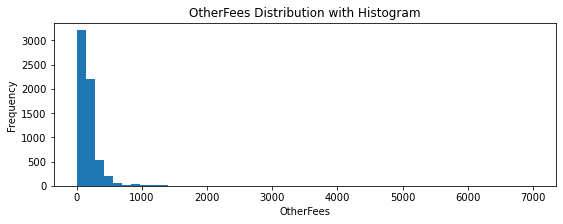

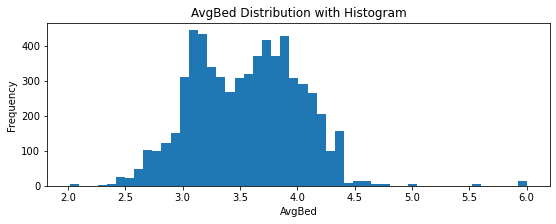

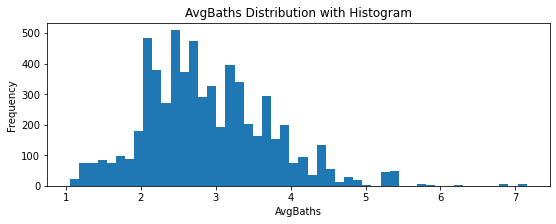

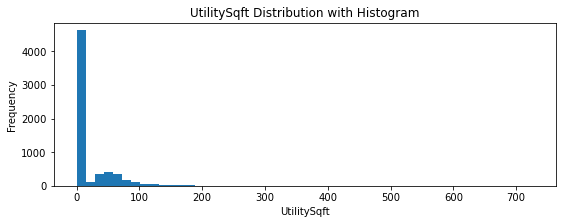

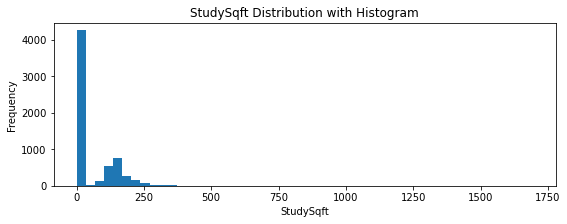

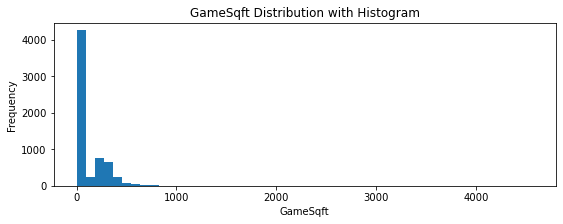

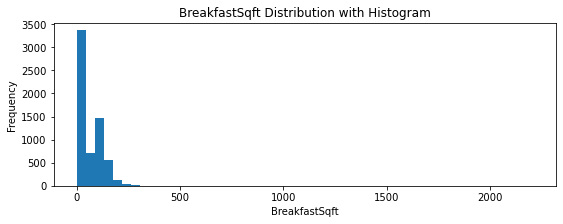

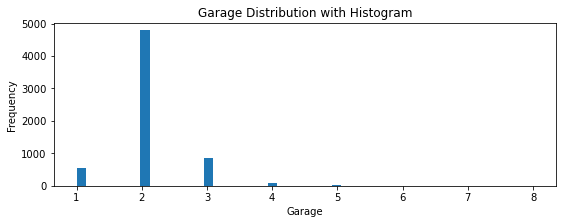

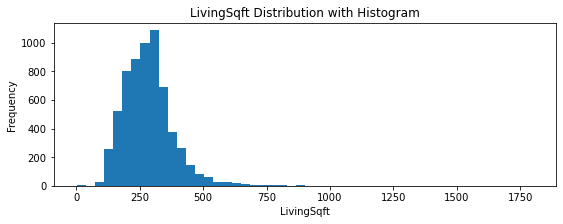

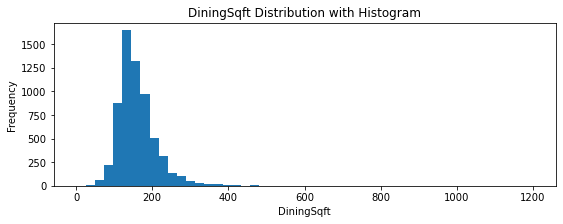

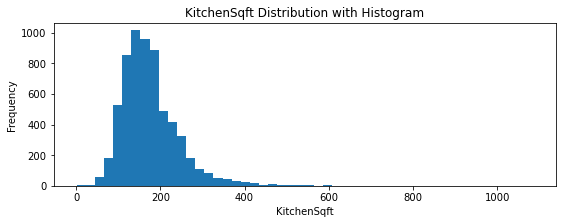

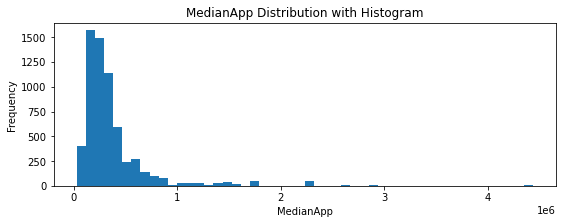

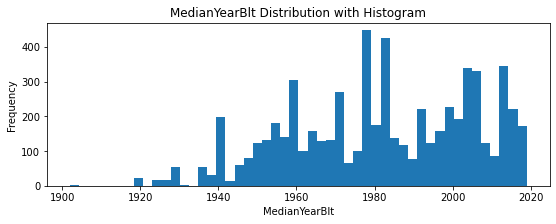

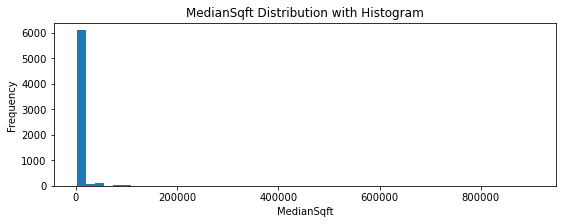

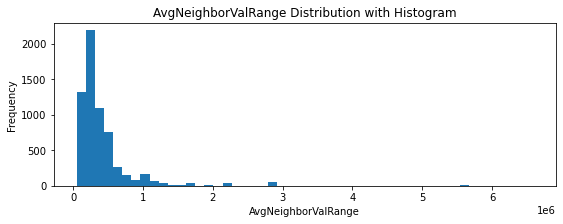

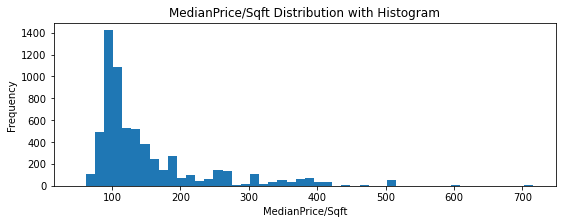

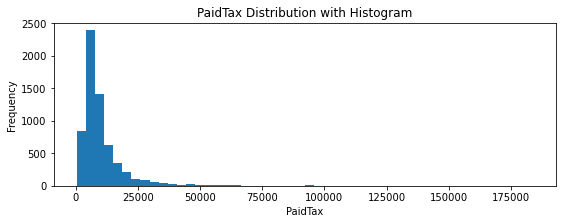

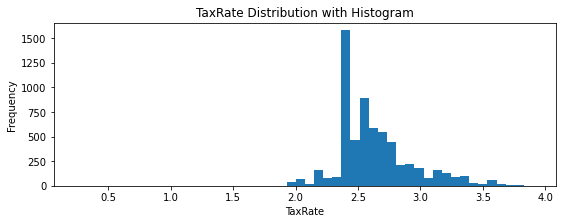

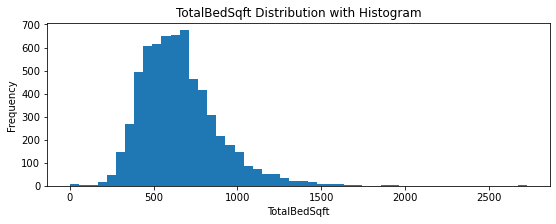

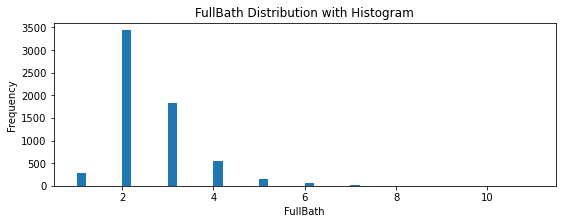

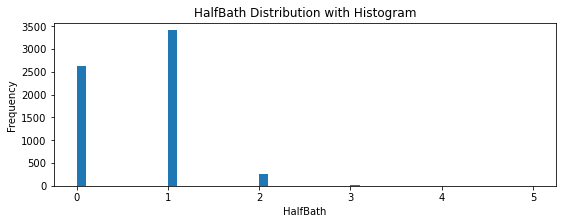

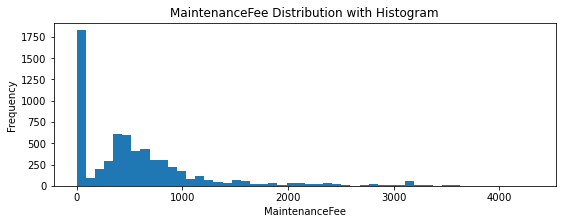

In [23]:
def plot_hist(variable):
    """This function craets histogram for passed in variabled"""
    plt.figure(figsize=(9,3))
    plt.hist(SingleFamilyHome[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
for i in numerical:
    plot_hist(i)

### 2.5.2 Year Built and Median Year Built<a id='2.5.2_Year_Built_and_Median_Year_Built'></a>

In [24]:
SingleFamilyHome.YearBuilt.describe()

count    6306.000000
mean     1985.441643
std        24.007853
min      1875.000000
25%      1968.000000
50%      1987.000000
75%      2006.000000
max      2019.000000
Name: YearBuilt, dtype: float64

In [25]:
SingleFamilyHome.MedianYearBlt.describe()

count    6306.000000
mean     1981.754678
std        23.280565
min      1902.000000
25%      1963.250000
50%      1982.000000
75%      2003.000000
max      2019.000000
Name: MedianYearBlt, dtype: float64

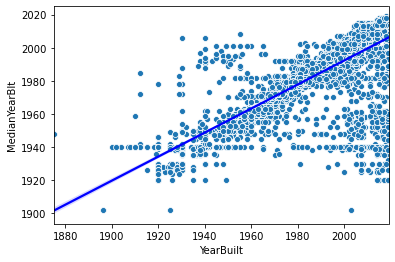

In [26]:
sns.scatterplot(x='YearBuilt', y='MedianYearBlt', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='YearBuilt', y='MedianYearBlt', data=SingleFamilyHome, scatter=False, color='b')

It would be easier to transfer year built of the house to age:

In [27]:
SingleFamilyHome['Age'] = date.today().year - SingleFamilyHome['YearBuilt']
SingleFamilyHome['MedianAge'] = date.today().year - SingleFamilyHome['MedianYearBlt']

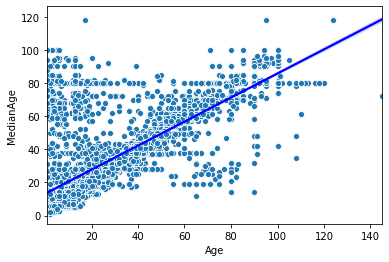

In [28]:
sns.scatterplot(x='Age', y='MedianAge', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='Age', y='MedianAge', data=SingleFamilyHome, scatter=False, color='b')

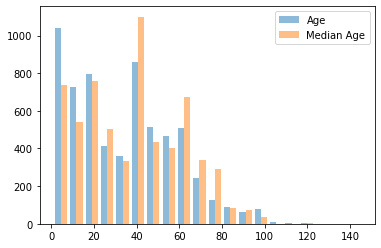

In [29]:
plt.hist([SingleFamilyHome.Age,SingleFamilyHome.MedianAge], bins=20, alpha=0.5, label=['Age','Median Age'])
plt.legend(loc='upper right')
plt.show()

In [30]:
# Drop YearBuilt and MedianYearBlt columns
SingleFamilyHome.drop(['YearBuilt','MedianYearBlt'],axis=1, inplace=True)

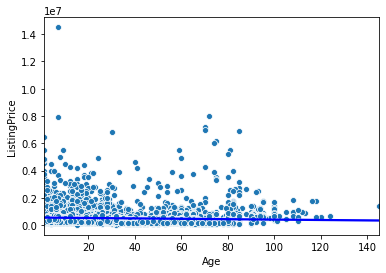

In [31]:
sns.scatterplot(x='Age', y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='Age', y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')

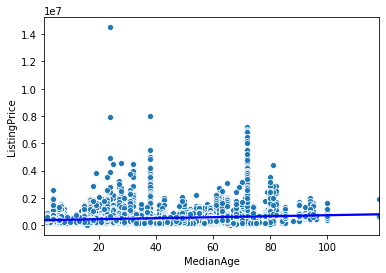

In [32]:
sns.scatterplot(x='MedianAge', y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='MedianAge', y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')

There is a small positive correlation between Median Age and house price which means for those subdivisions that have high median age the price is going up. This is happen because for those old subdivisions majority of house price comes from high lot price in these areas.

Text(0.5, 1.0, 'Scatter Plot for Listing Price vs Year Biult')

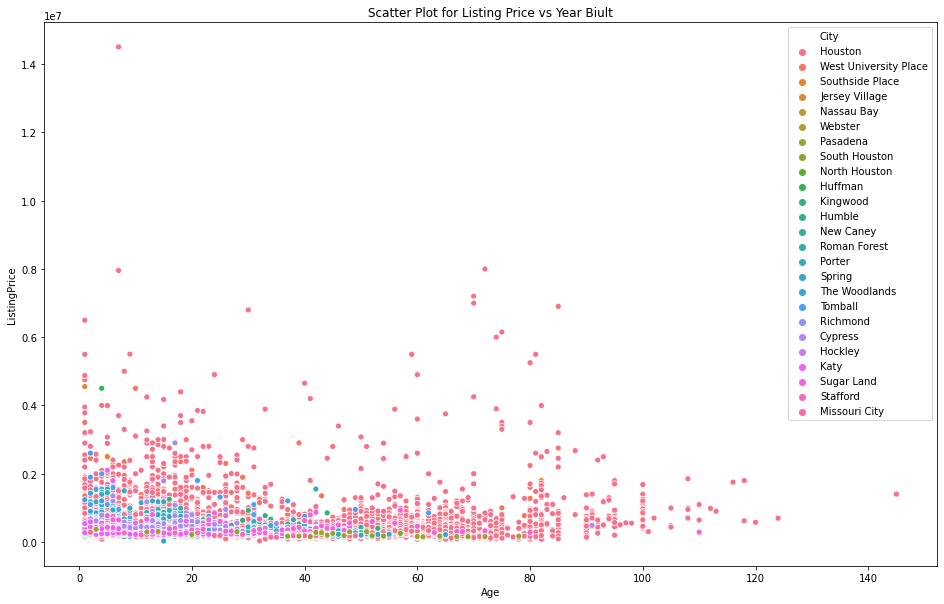

In [33]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='Age', y='ListingPrice', data=SingleFamilyHome,hue='City')
plt.title('Scatter Plot for Listing Price vs Year Biult')

### 2.4.2 Building Sqft<a id='2.4.2_Building_Sqft'></a>

In [34]:
SingleFamilyHome.BuildSqft.describe()

count     6306.000000
mean      2814.049794
std       1281.071176
min        400.000000
25%       1964.000000
50%       2565.000000
75%       3372.750000
max      21032.000000
Name: BuildSqft, dtype: float64

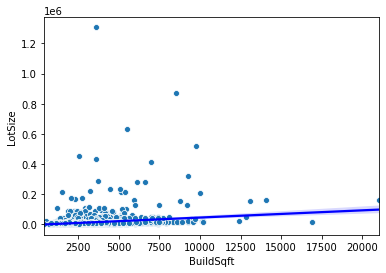

In [35]:
sns.scatterplot(x='BuildSqft', y='LotSize', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LotSize', data=SingleFamilyHome, scatter=False, color='b')

In [36]:
SingleFamilyHome[SingleFamilyHome.BuildSqft > SingleFamilyHome.LotSize][['Address','BuildSqft','LotSize']]

,Address,BuildSqft,LotSize
0,2614 Capitol Street,1920,1556.0
1,2708 EaDo Grove Lane,2162,1435.0
2,619 Live Oak Street,2671,2006.0
8,1317 Nagle Street,2078,1463.0
9,1735 Eado Point Lane,1736,1428.0
...,...,...,...
4340,2618 Greenbriar Drive,3271,2500.0
4650,2849 Kings Retreat Circle,2783,1855.0
4656,2746 Kings Retreat Circle,2823,1996.0
4661,2853 Kings Retreat Circle,2823,1948.0


There are 189 houses where the building Sqft is higher than lot size. If we look at those houses in HAR.com it seems these houses do not have front yard and back yard that is why the building Sqft is higher than lot size.

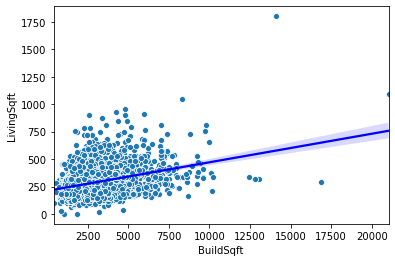

In [37]:
sns.scatterplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, scatter=False, color='b')

There are some outliers but there is no house with living area higher than building Sqft so let leave them for now.

In [38]:
SingleFamilyHome[SingleFamilyHome.LivingSqft > SingleFamilyHome.BuildSqft][['Address','BuildSqft','LivingSqft']]

,Address,BuildSqft,LivingSqft


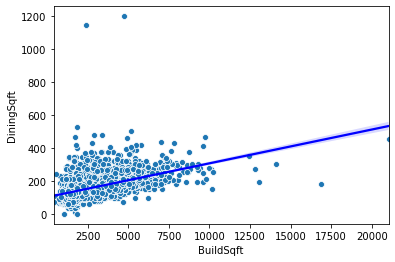

In [39]:
sns.scatterplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, scatter=False, color='b')

In [40]:
SingleFamilyHome[SingleFamilyHome.DiningSqft>400][['Address','BuildSqft','DiningSqft','LivingSqft']]

,Address,BuildSqft,DiningSqft,LivingSqft
101,2616 Quenby Avenue,5775,420.0,440.0
283,244 Malone Street,3361,480.0,870.0
1059,3429 Ella Lee Lane,4741,1200.0,551.0
1362,9302 Sharpcrest Street,1780,420.0,120.0
1579,10219 Cedar Creek Drive,2765,432.0,270.0
1602,6 W Rivercrest Drive,21032,456.0,1088.0
1887,5514 Russett Drive,9598,414.0,333.0
1891,5360 Spring Park Street,5140,504.0,285.0
1961,6063 Crab Orchard Road,7843,432.0,540.0
1962,5737 Bayou Glen Road,7022,440.0,440.0


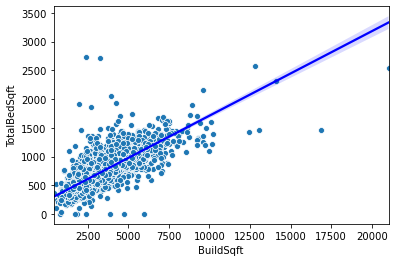

In [41]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [42]:
SingleFamilyHome[SingleFamilyHome.TotalBedSqft>2000][['Address','BuildSqft','TotalBedSqft']]

,Address,BuildSqft,TotalBedSqft
1602,6 W Rivercrest Drive,21032,2549.000000
1604,27 E Rivercrest Drive,14094,2311.541667
1617,10043 Cedar Creek Drive,3935,2056.000000
2740,7919 Albin Lane,9584,2160.000000
3600,4615 Twisting Road,2360,2725.000000
3754,1802 Castlerock Drive,12821,2571.466667
5832,12023 Via Palazzo Lane,3239,2719.000000


In [66]:
SingleFamilyHome.loc[3600,'TotalBedSqft'] = 709
SingleFamilyHome.loc[5832,'TotalBedSqft'] = 648

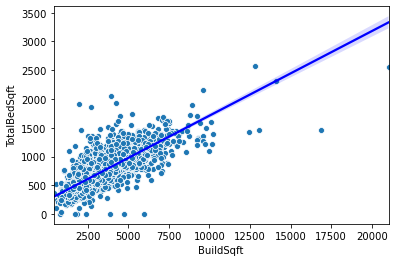

In [67]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')